Importing relevant libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

Set constants (denoted with capital)

In [3]:
SRC_PATH = 'src'
DATA_PATH = '/Users/aimee/Desktop/'
SAVE_PATH = '/Users/aimee/Desktop/'


create output directory if one doesn't exist

In [4]:
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

List the csv files i have in my directory

In [5]:
data_files = [f for f in os.listdir(DATA_PATH) if f.endswith('.csv')]
n_data_files = len(data_files)

thetas = []
timeseries = []
print(data_files)


['20240403_receptorKO.csv', 'ClassCOVIDData.csv']


read in data file

In [6]:
file_name = data_files[0]
df = pd.read_csv("/Users/aimee/Desktop/20240403_receptorKO.csv", sep=" ", header=None, names=["time_step", "molecule", "state", "x", "y", "species_id"], on_bad_lines='warn')

create dataframe which gives time and number of each species present

In [7]:
molecules = {
    1: "vesicle_F",
    2: "vesicle_F_top",
    3: "vesicle_R",
    4: "vesicle_R_top",
    5: "vesicle_H",
    6: "vesicle_H_top",
    7: "fused_vesicle_F",
    8: "fused_vesicle_R",
    9: "fused_vesicle_H",
    10: "F",
    11: "H",
    12: "R",
    13: "RR",
    14: "HF",
    15: "HFRR",
    16: "F species (F + HF + HFRR)",
    17: "H species (H + HF + HFRR)",
    18: "R species (R + RR + HFRR)"
    
}

Processing counts data


In [8]:
def get_counts(df, time_step):
    filtered = df[df["time_step"] == time_step]
    counts = filtered["molecule"].value_counts().to_dict()
    for k in molecules.keys():
        if not k in counts:
            counts[k] = 0.0
    return counts

time_steps = df["time_step"].unique().tolist()
rows = [get_counts(df, t) for t in time_steps]
counts_df = pd.DataFrame.from_dict(rows)

cols = counts_df.columns.tolist()
cols.sort()
counts_df = counts_df[cols]

counts_df[16] = counts_df[10] + counts_df[14] + counts_df[15]
counts_df[17] = counts_df[11] + counts_df[14] + counts_df[15]
counts_df[18] = counts_df[12] + 2*counts_df[13] + 2*counts_df[15]

Plotting grouped counts data

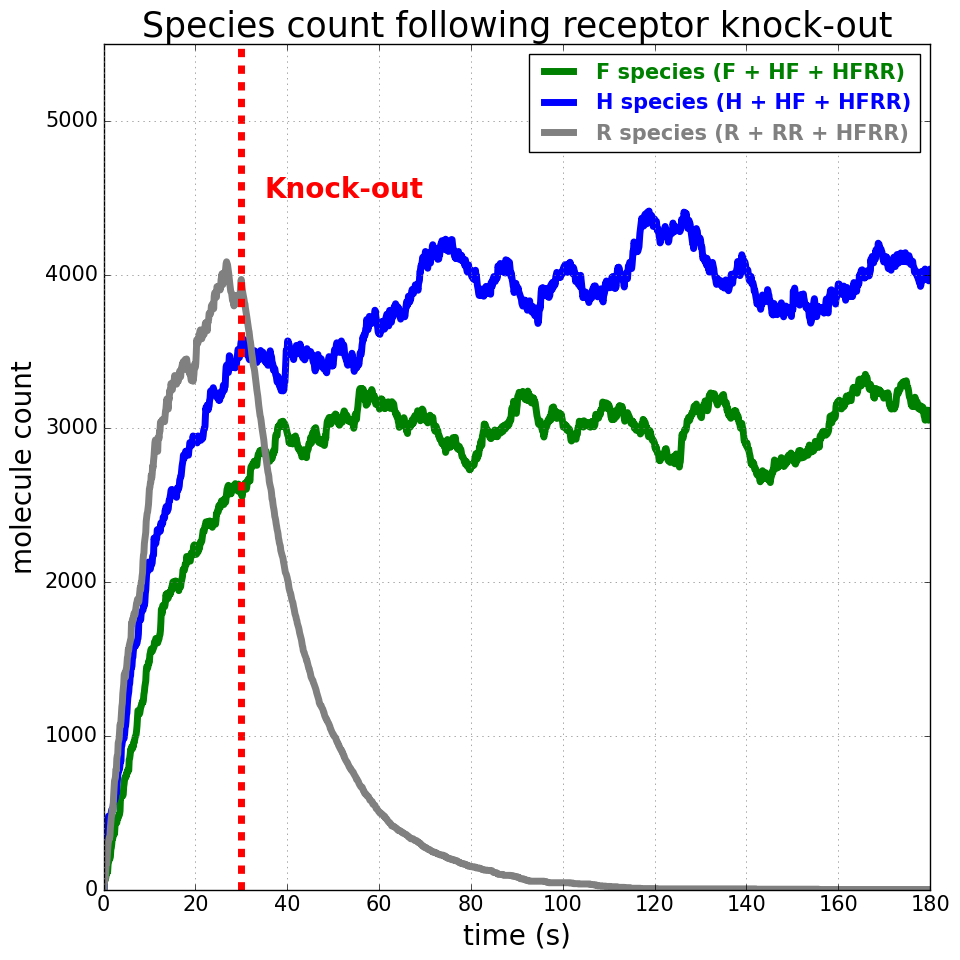

In [16]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.style.use('classic')
to_plot = [16, 17, 18]
cmap = plt.colormaps['viridis']
colors = ['green', 'blue', 'grey']
time_steps_npy = df["time_step"].unique()
for (n, m) in enumerate(to_plot):
    plt.plot(time_steps_npy/10, counts_df[m], color=colors[n], label=molecules[m], linewidth=5)

plt.rcParams.update({'font.size': 20})
plt.xlabel("time (s)", color="black", fontsize=20)
plt.ylabel(f"molecule count",  color="black", fontsize=20)
plt.legend(labelcolor='linecolor', loc="upper right", prop=dict(size=15, weight='bold'))
plt.xlim(0,180)
plt.ylim(0, 5500)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Species count following receptor knock-out", fontsize=25)
plt.axvline(x=30, color='red', linestyle='dashed', linewidth=5)
plt.text(35, 4500, 'Knock-out', color='red', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.grid(color='grey')
plt.savefig("receptor_knockout.png")
plt.show()

Plotting HFRR counts data

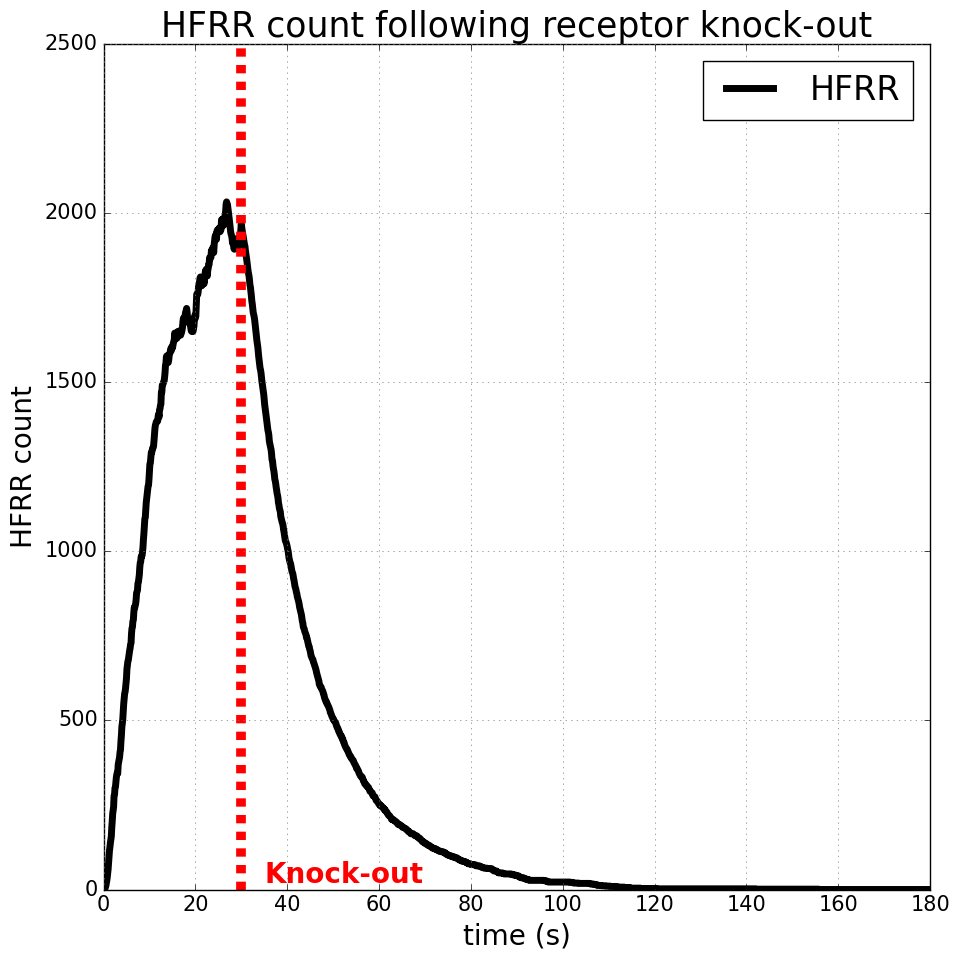

In [9]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.style.use('classic')
to_plot = [15]
cmap = plt.colormaps['viridis']
colors = cmap(np.linspace(0.7,0.7,1))
time_steps_npy = df["time_step"].unique()
for (n, m) in enumerate(to_plot):
    plt.plot(time_steps_npy/10, counts_df[m], color='black', label=molecules[m], linewidth=5)

plt.rcParams.update({'font.size': 20})
plt.xlabel("time (s)", fontsize=20)
plt.ylabel("HFRR count", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,180)
plt.legend(loc="upper right")
plt.title("HFRR count following receptor knock-out", fontsize=25)
plt.axvline(x=30, color='red', linestyle='dashed', linewidth=7)
plt.text(35, 20, 'Knock-out', color='red', fontsize=20, fontweight='bold')
plt.grid(color='grey')
plt.tight_layout()
plt.savefig("receptor_knockout_FHRR.png")
plt.show()

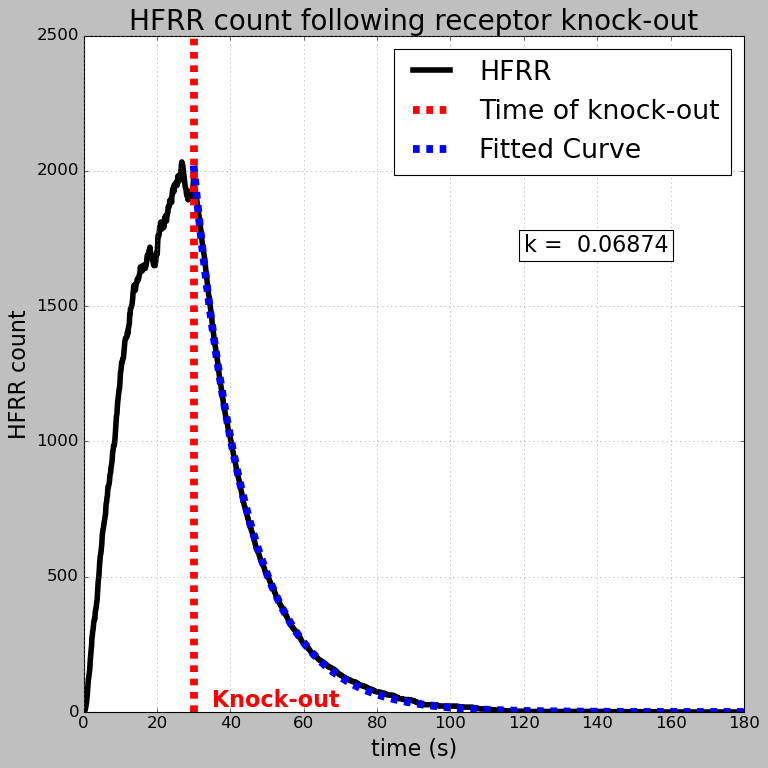

Fitted parameters:
Amplitude (A): 15881.617934299002
Decay time constant (tau): 14.546621195704454


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams['text.usetex'] = True
# Define exponential decay function
def exponential_decay(t, A, tau):
    return A * np.exp(-t / tau)

# Your existing code
%matplotlib inline
plt.figure(figsize=(10,10))
plt.style.use('classic')
to_plot = [15]
cmap = plt.colormaps['viridis']
colors = cmap(np.linspace(0.7,0.7,1))
time_steps_npy = df["time_step"].unique()
time_steps_npy = time_steps_npy/10
for (n, m) in enumerate(to_plot):
    plt.plot(time_steps_npy, counts_df[m], color='black', label=molecules[m], linewidth=5)

plt.rcParams.update({'font.size': 20})
plt.xlabel("time (s)", fontsize=20)
plt.ylabel("HFRR count", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,180)
plt.title("HFRR count following receptor knock-out", fontsize=25)
plt.axvline(x=30, color='red', linestyle='dashed', linewidth=7, label='Time of knock-out')
plt.text(35, 20, 'Knock-out', color='red', fontsize=20, fontweight='bold')
plt.grid(color='grey')

# Curve fitting
t_data = time_steps_npy[300:]  # Time data
y_data = counts_df[15][300:]  # HFRR count data

# Initial guess for parameters
initial_guess = (y_data[300], 30)  # Initial amplitude and decay time constant guess

# Perform curve fitting
params, covariance = curve_fit(exponential_decay, t_data, y_data, p0=initial_guess)

# Plot fitted curve
t_fit = np.linspace(30, 180, 1000)  # Time range for fitted curve
plt.plot(t_fit, exponential_decay(t_fit, *params), color='blue', linestyle='--', lw=7, label='Fitted Curve')
A_fit, tau_fit = params
k = 1/tau_fit
plt.text(x=120, y=1700, s=f"k = {k: .4}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=20)

plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("receptor_knockout_FHRR_fitted.png")
plt.show()

# Extract fitted parameters
print("Fitted parameters:")
print("Amplitude (A):", A_fit)
print("Decay time constant (tau):", tau_fit)


In [25]:
counts_df[15][300:]

300     1957.0
301     1948.0
302     1939.0
303     1932.0
304     1924.0
         ...  
1796       0.0
1797       0.0
1798       0.0
1799       0.0
1800       0.0
Name: 15, Length: 1501, dtype: float64

In [29]:
y_data[300]

1957.0

In [31]:
t_data

array([1.000e-01, 2.000e-01, 3.000e-01, ..., 1.799e+02, 1.800e+02,
       1.801e+02])